# Prefix

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import gwsurrogate as gws
import gwtools
import scri
from mpl_toolkits.mplot3d import Axes3D

lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [2]:
# optional: load matplotlib style sheet (only if you have one)
plt.style.use("~/MA/Literatur/MATPLOTLIB_RCPARAMS.sty")
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [3]:
# load the NR surrogate
sur = gws.LoadSurrogate('NRSur7dq4')

Loaded NRSur7dq4 model


# Create WaveformMode object

In [4]:
# example configuration
q = 4
chi1 = [-0.19, -0.6,0.]
chi2 = [-0.8,0.,0.]

dt = 0.1        # timestep size, Units of M
f_low = 0       # initial frequency, f_low=0 returns the full surrogate

# generating modes with NRSur7dq4
# h is a dictionary of available modes with (l, m) tuples as keys
t, h, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low)    

In [5]:
# NRSur7dq4 available modes
ell_min = 2
ell_max = 4

# prepare and create WaveformMode object
data = list(h.values())
data = np.array(data).T

waveform_modes = scri.WaveformModes(
    dataType=scri.h,             # dateType strain
    t=t,                         # time array
    data=data,                   # strain data
    ell_min=ell_min,             
    ell_max=ell_max,
    frameType=scri.Inertial,     # modes in inertial frame 
    r_is_scaled_out=True,        # lumonosity distance scaled out
    m_is_scaled_out=True,        # total mass scaled out
)

# Waveform angular velocity

In [6]:
omega = waveform_modes.angular_velocity()
Ldt = waveform_modes.LdtVector()
Vh = waveform_modes.LLDominantEigenvector() 

len(Vh[:,0])

44001

In [16]:
mergerindx = 43000
t[mergerindx]

3.19596438203007e-09

In [8]:
size = 11

params = {'xtick.labelsize' : size, 
          'ytick.labelsize' : size, 
          'axes.labelsize' : size, 
          'legend.fontsize' : size, 
          'font.size' : size,
          'axes.titlesize': size
         }
plt.rcParams.update(params)

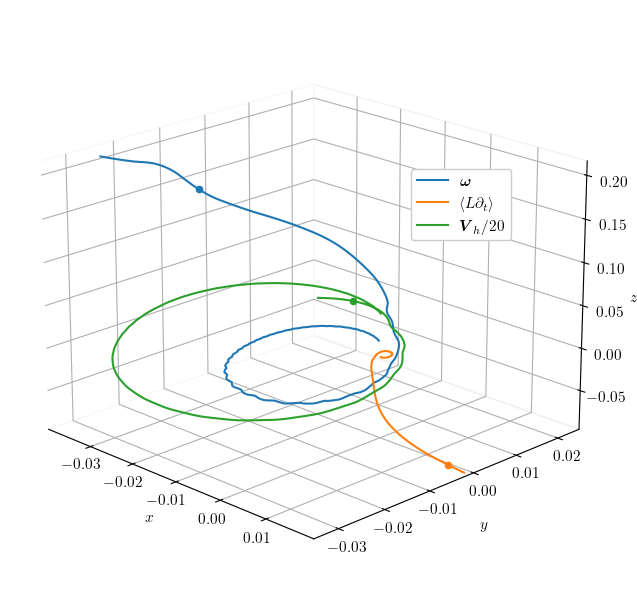

In [58]:
scale = 1/20
indx_after_merger = 50

fig = plt.figure(figsize = (6,6), constrained_layout=True)
ax1 = fig.add_subplot(111, projection='3d')

ax1.plot(omega[:,0][:mergerindx+indx_after_merger], 
         omega[:,1][:mergerindx+indx_after_merger], 
         omega[:,2][:mergerindx+indx_after_merger], label=r'$\boldsymbol{\omega}$')
ax1.plot(Ldt[:,0][:mergerindx+indx_after_merger-38], 
         Ldt[:,1][:mergerindx+indx_after_merger-38], 
         Ldt[:,2][:mergerindx+indx_after_merger-38], label=r'$\langle L\partial_t \rangle$')
ax1.plot(Vh[:,0][:mergerindx+indx_after_merger]*scale, 
         Vh[:,1][:mergerindx+indx_after_merger]*scale, 
         Vh[:,2][:mergerindx+indx_after_merger]*scale, label=r'$\boldsymbol{V}_h/20$')
ax1.scatter(omega[:,0][mergerindx], omega[:,1][mergerindx], omega[:,2][mergerindx])
ax1.scatter(Ldt[:,0][mergerindx], Ldt[:,1][mergerindx], Ldt[:,2][mergerindx])
ax1.scatter(Vh[:,0][mergerindx]*scale, Vh[:,1][mergerindx]*scale, Vh[:,2][mergerindx]*scale)

ax1.legend(loc='center right', bbox_to_anchor=(0.86, 0.67), facecolor='white', framealpha=1)
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.set_xlabel(r"$x$", labelpad=0)
ax1.tick_params(axis='x', pad=-1)
ax1.set_ylabel(r"$y$")
ax1.tick_params(axis='y', pad=-1)
ax1.set_zlabel(r"$z$", labelpad=0)
ax1.tick_params(axis='z', pad=3)
ax1.set_xlim(-.039, .019)
ax1.set_ylim(-.034, .024)
ax1.set_zlim(-0.09, .21)

 
ax1.view_init(azim=-45, elev=20)

#fig.tight_layout()
fig.savefig('waveform_angular_velocity.pdf', bbox_inches='tight')
plt.show()

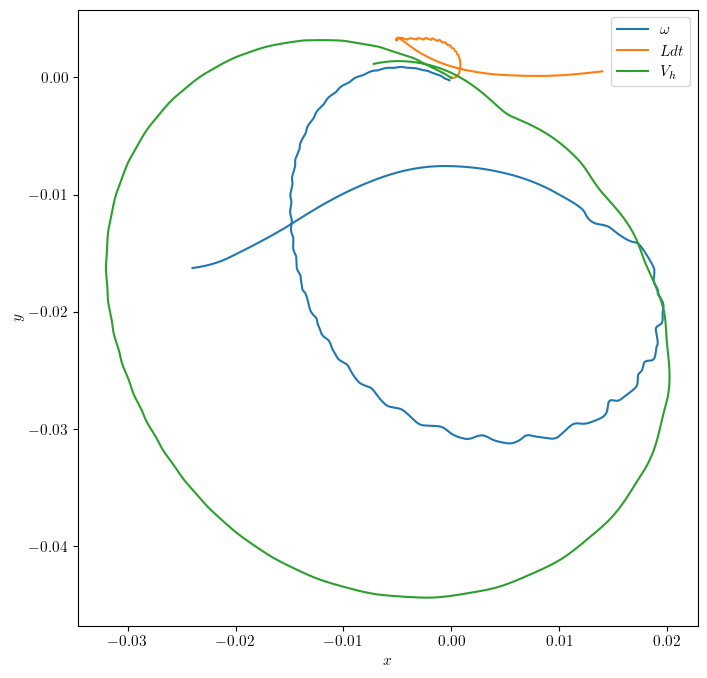

In [10]:
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)

ax1.plot(omega[:,0][:mergerindx], omega[:,1][:mergerindx], label='$\omega$')
ax1.plot(Ldt[:,0][:mergerindx], Ldt[:,1][:mergerindx], label='$Ldt$')
ax1.plot(Vh[:,0][:mergerindx]*scale, Vh[:,1][:mergerindx]*scale, label='$V_h$')

ax1.legend()
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")

plt.show()